# The Model-Driven Engineering Paradigm for Quantum Algorithms: Bridging Heterogeneity Across Quantum Computing Platforms

## VQE with Quantum Gate Based Model 

In [1]:
from qiskit_algorithms import NumPyMinimumEigensolver
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import TwoLocal
from qiskit_algorithms.optimizers import SPSA
from qiskit_algorithms import VQE
import pylab
from qiskit.circuit.library import EfficientSU2
from qiskit_algorithms.utils import algorithm_globals
from qiskit_aer.primitives import Estimator as AerEstimator

### Full-entangled model 

In [2]:
hamil = SparsePauliOp(['ZZII', 'ZIZI','IZZI','IIZZ','IZIZ', 'ZIIZ' , 'ZIII','IZII', 'IIZI','IIIZ'],coeffs=[1.,1.,1.,1.,1.,1.,1.,1.,1.,1.])

In [3]:
# Finding the exact value  for 
numpy_solver = NumPyMinimumEigensolver()
result = numpy_solver.compute_minimum_eigenvalue(operator=hamil)
ref_value = result.eigenvalue.real
print(f"Reference value: {ref_value:.5f}")

Reference value: -2.00000


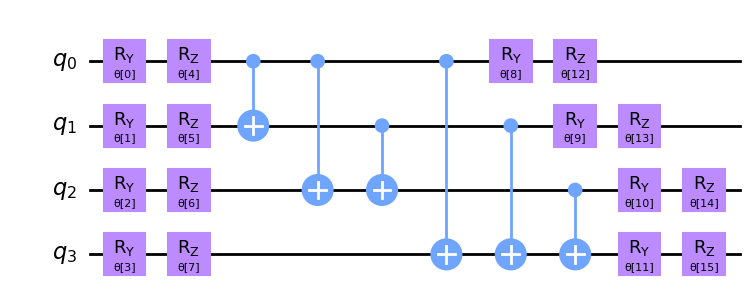

In [4]:
iterations = 300
ansatz = EfficientSU2(hamil.num_qubits,entanglement='full', reps=1)
spsa = SPSA(maxiter=iterations)
ansatz.decompose().draw('mpl')

In [5]:
# define callback
# note: Re-run this cell to restart lists before training
counts = []
values = []

def store_intermediate_result(eval_count, parameters, mean, std):
    counts.append(eval_count)
    values.append(mean)

In [6]:
seed = 170
algorithm_globals.random_seed = seed

noiseless_estimator = AerEstimator(
    run_options={"seed": seed, "shots": 1024},
    transpile_options={"seed_transpiler": seed},
)

In [7]:
vqe = VQE(
    noiseless_estimator, ansatz, optimizer=spsa, callback=store_intermediate_result
)
result = vqe.compute_minimum_eigenvalue(operator=hamil)

print(f"VQE on Aer qasm simulator (no noise): {result.eigenvalue.real:.5f}")
print(
    f"Delta from reference energy value is {(result.eigenvalue.real - ref_value):.5f}"
)

VQE on Aer qasm simulator (no noise): -2.00000
Delta from reference energy value is 0.00000


Text(0.5, 1.0, 'Full-entangled Ising')

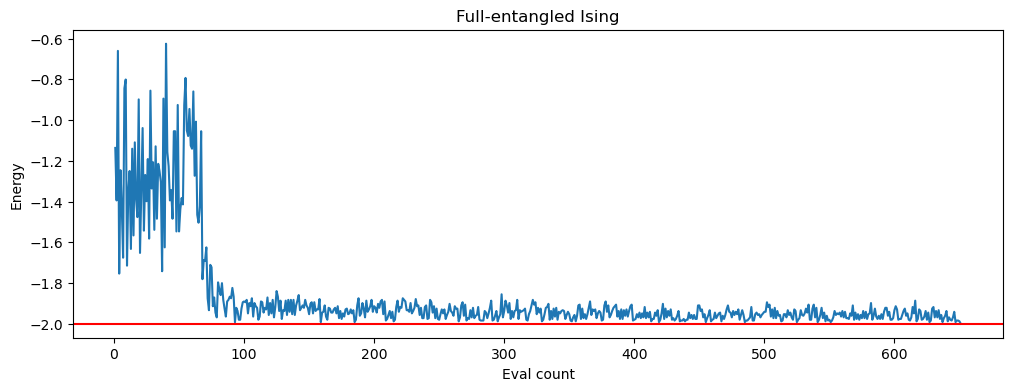

In [8]:
pylab.rcParams["figure.figsize"] = (12, 4)
pylab.plot(counts, values)
pylab.xlabel("Eval count")
pylab.ylabel("Energy")
pylab.axhline(y = ref_value, color = 'r', linestyle = '-') 
pylab.title("Full-entangled Ising")

In [9]:
len(counts)

651

### Linear-entangled model

In [10]:
hamil = SparsePauliOp(['ZZII', 'IZZI','IIZZ', 'ZIII','IZII', 'IIZI','IIIZ'],coeffs=[1.,1.,1.,1.,1.,1.,1.])

In [11]:
# Finding the exact value  for 
numpy_solver = NumPyMinimumEigensolver()
result = numpy_solver.compute_minimum_eigenvalue(operator=hamil)
ref_value = result.eigenvalue.real
print(f"Reference value: {ref_value:.5f}")

Reference value: -3.00000


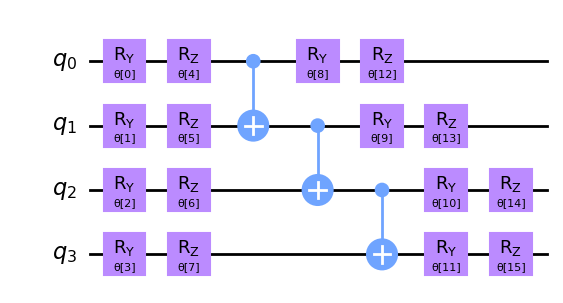

In [12]:
iterations = 300
ansatz_linear = EfficientSU2(hamil.num_qubits,entanglement='linear', reps=1)
spsa = SPSA(maxiter=iterations)
ansatz_linear.decompose().draw('mpl')

In [13]:
# define callback
# note: Re-run this cell to restart lists before training
counts_lin = []
values_lin = []

def store_intermediate_result_lin(eval_count, parameters, mean, std):
    counts_lin.append(eval_count)
    values_lin.append(mean)

In [14]:
vqe = VQE(
    noiseless_estimator, ansatz_linear, optimizer=spsa, callback=store_intermediate_result_lin
)
result = vqe.compute_minimum_eigenvalue(operator=hamil)

print(f"VQE on Aer qasm simulator (no noise): {result.eigenvalue.real:.5f}")
print(
    f"Delta from reference energy value is {(result.eigenvalue.real - ref_value):.5f}"
)

VQE on Aer qasm simulator (no noise): -3.00000
Delta from reference energy value is 0.00000


Text(0.5, 1.0, 'Linear-entangled Ising')

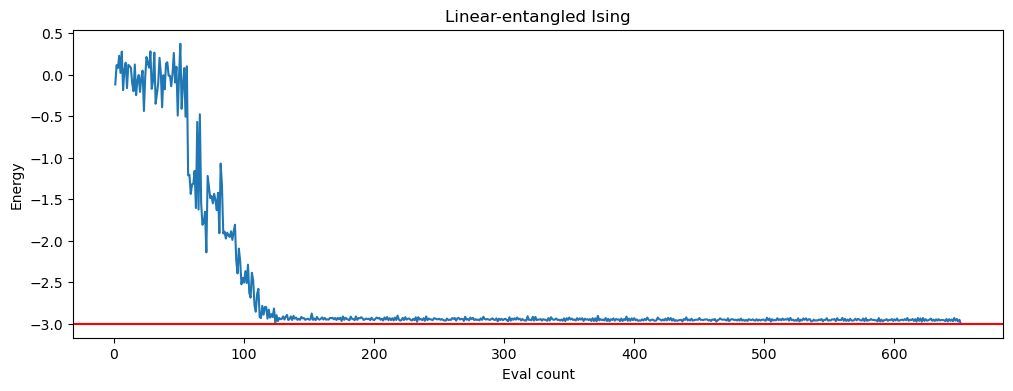

In [15]:
pylab.rcParams["figure.figsize"] = (12, 4)
pylab.plot(counts_lin, values_lin)
pylab.xlabel("Eval count")
pylab.ylabel("Energy")
pylab.axhline(y = ref_value, color = 'r', linestyle = '-') 
pylab.title("Linear-entangled Ising")

### Circular-entangled model

In [22]:
hamil = SparsePauliOp(['ZZII', 'IZZI','IIZZ', 'ZIIZ' , 'ZIII','IZII', 'IIZI','IIIZ'],coeffs=[1.,1.,1.,1.,1.,1.,1.,1.])

In [23]:
# Finding the exact value  for 
numpy_solver = NumPyMinimumEigensolver()
result = numpy_solver.compute_minimum_eigenvalue(operator=hamil)
ref_value = result.eigenvalue.real
print(f"Reference value: {ref_value:.5f}")

Reference value: -4.00000


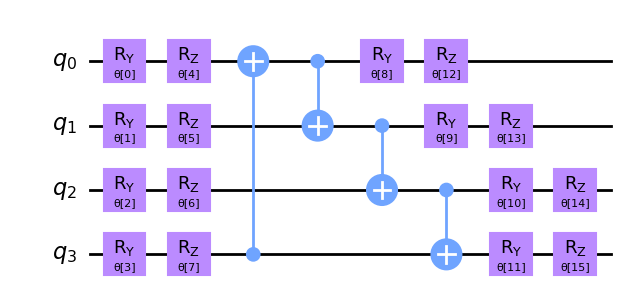

In [24]:
iterations = 300
ansatz_circ = EfficientSU2(hamil.num_qubits,entanglement='circular', reps=1)
spsa = SPSA(maxiter=iterations)
ansatz_circ.decompose().draw('mpl')

In [25]:
# define callback
# note: Re-run this cell to restart lists before training
counts_circ = []
values_circ = []

def store_intermediate_result_circ(eval_count, parameters, mean, std):
    counts_circ.append(eval_count)
    values_circ.append(mean)

In [26]:
vqe = VQE(
    noiseless_estimator, ansatz_circ, optimizer=spsa, callback=store_intermediate_result_circ
)
result = vqe.compute_minimum_eigenvalue(operator=hamil)

print(f"VQE on Aer qasm simulator (no noise): {result.eigenvalue.real:.5f}")
print(
    f"Delta from reference energy value is {(result.eigenvalue.real - ref_value):.5f}"
)

VQE on Aer qasm simulator (no noise): -4.00000
Delta from reference energy value is 0.00000


Text(0.5, 1.0, 'Circular-entangled Ising')

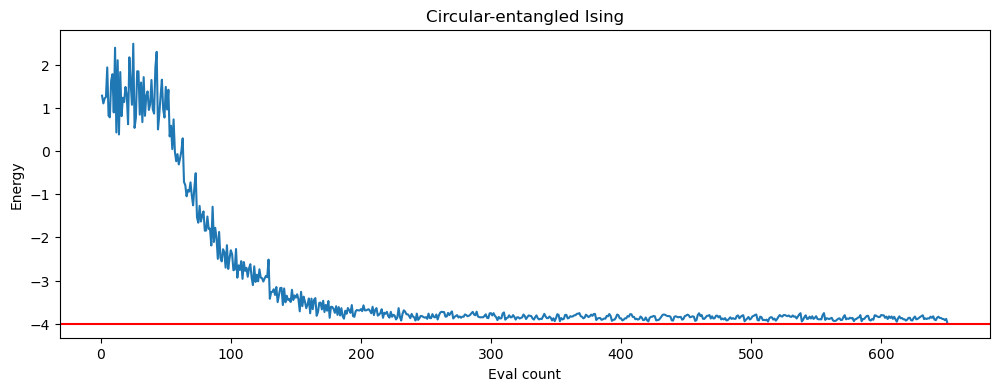

In [27]:
pylab.rcParams["figure.figsize"] = (12, 4)
pylab.plot(counts_circ, values_circ)
pylab.xlabel("Eval count")
pylab.ylabel("Energy")
pylab.axhline(y = ref_value, color = 'r', linestyle = '-') 
pylab.title("Circular-entangled Ising")

#   DWAVE- Quantum Annealing 

In [20]:
import os
from dwave.system import DWaveSampler, EmbeddingComposite
import dimod
import dwave.inspector

### Full-entangled model

In [21]:
# Define the Ising model parameters for full entanglement
h = {0: 1, 1: 1, 2: 1, 3: 1}  # external magnetic fields
J = {
    (0, 1): 1, (0, 2): 1, (0, 3): 1,  # coupler biases between qubit 0 and others
    (1, 2): 1, (1, 3): 1,            # coupler biases between qubit 1 and others (2, 3)
    (2, 3): 1                        # coupler bias between qubit 2 and 3
}  # Fully entangled model with all qubits interacting
#
# Get a sampler that can solve Ising models
sampler = EmbeddingComposite(DWaveSampler(token='YOUR LEAP API TOKEN'))

# Sample the Ising model
sampleset = sampler.sample_ising(h, J, num_reads=100)

# Use the D-Wave Inspector to visualize the problem and the solution
# Once it is runned there will be inspector to analyze the ising model on DWave hardware
dwave.inspector.show(sampleset)

# Find and print the ground state energy
# The lowest energy sample is considered the ground state
ground_state_energy = sampleset.first.energy
print("Ground State Energy:", ground_state_energy)

# Optionally, print the sample corresponding to the ground state
ground_state_sample = sampleset.first.sample
print("Ground State Sample:", ground_state_sample)


Serving Inspector on http://127.0.0.1:18000/?problemId=bc266c66-6286-4946-bd0d-b41eb02e5992

Ground State Energy: -2.0
Ground State Sample: {0: -1, 1: 1, 2: -1, 3: -1}


### Linear-entangled model

In [22]:
# Define the Ising model parameters for a linear chain
h = {0: 1, 1: 1, 2: 1, 3: 1}  # external magnetic fields
J = {(0, 1): 1, (1, 2): 1, (2, 3): 1}  # coupler biases between qubits, linearly entangled

# Get a sampler that can solve Ising models
sampler = EmbeddingComposite(DWaveSampler(token='YOUR LEAP API TOKEN'))

# Sample the Ising model
sampleset = sampler.sample_ising(h, J, num_reads=100)


# Once it is runned there will be inspector to analyze the ising model on DWave hardware
# Use the D-Wave Inspector to visualize the problem and the solution
dwave.inspector.show(sampleset)
# Find and print the ground state energy

# The lowest energy sample is considered the ground state
ground_state_energy = sampleset.first.energy
print("Ground State Energy:", ground_state_energy)

# Optionally, print the sample corresponding to the ground state
ground_state_sample = sampleset.first.sample
print("Ground State Sample:", ground_state_sample)


Serving Inspector on http://127.0.0.1:18000/?problemId=639a86ba-a6de-48b8-8c20-766ed0d0797d

Ground State Energy: -3.0
Ground State Sample: {0: -1, 1: 1, 2: -1, 3: -1}


### Circular-entangled model

In [23]:
# Define the Ising model parameters
h = {0: 1, 1: 1, 2: 1, 3: 1}  # external magnetic fields
J = {(0, 1): 1, (1, 2): 1, (2, 3): 1, (3, 0): 1}  # coupler biases between qubits

# Get a sampler that can solve Ising models
sampler_1 = EmbeddingComposite(DWaveSampler(token='YOUR LEAP API TOKEN'))

# Sample the Ising model
sampleset_1 = sampler_1.sample_ising(h, J, num_reads=100)

# Once it is runned there will be inspector to analyze the ising model on DWave hardware
# Use the D-Wave Inspector to visualize the problem and the solution
dwave.inspector.show(sampleset_1)

# Find and print the ground state energy
# The lowest energy sample is considered the ground state
ground_state_energy = sampleset_1.first.energy
print("Ground State Energy:", ground_state_energy)

# Optionally, print the sample corresponding to the ground state
ground_state_sample = sampleset_1.first.sample
print("Ground State Sample:", ground_state_sample)


Serving Inspector on http://127.0.0.1:18000/?problemId=943e45c3-0a75-4812-87cb-f0a3c2d06c01

Ground State Energy: -4.0
Ground State Sample: {0: 1, 1: -1, 2: 1, 3: -1}
